In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
data_test=pd.read_csv("/mnt/c/Users/ADMIN/Desktop/NUCLEI - TITANIC/test.csv")
data_train=pd.read_csv("/mnt/c/Users/ADMIN/Desktop/NUCLEI - TITANIC/train.csv")

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
print(data_train.shape," ",data_test.shape)

(891, 12)   (418, 11)


In [8]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#removing null values and useless columns from training data

In [10]:
data_train['Age'].fillna(data_train['Age'].median(),inplace=True)

In [11]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
data_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
data_train['Embarked'].replace(np.nan,'S',inplace=True)

In [14]:
data_train.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [15]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [16]:
#removing null values and useless columns in test dataset

In [17]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
print(data_test.isnull().sum())
print(data_test.shape)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
(418, 11)


In [19]:
data_test['Age'].fillna(data_test['Age'].median(),inplace=True)
data_test.drop(['Ticket','Cabin'],axis=1,inplace=True)

In [20]:
#Finding the row which has fare=null
data_test[data_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S


In [21]:
#Finding the distribution of fare among class and age
data_test.groupby(['Pclass','Age']).median()
data_test.groupby(['Pclass','Age']).mean()

PassengerId  SibSp  Parch       Fare
Pclass Age                                       
1      6.0        1088.0    0.0    2.0  134.50000
       13.0        956.0    2.0    2.0  262.37500
       17.0       1295.0    0.0    0.0   47.10000
       18.0       1180.5    1.0    0.0   56.55000
       21.0       1019.0    0.0    0.5   43.96460
...                  ...    ...    ...        ...
3      43.0       1026.0    0.0    0.0    7.89580
       45.0       1056.0    0.5    0.0   10.66665
       47.0        893.0    1.0    0.0    7.00000
       50.0        917.0    1.0    0.0   14.50000
       60.5       1044.0    0.0    0.0        NaN

[141 rows x 4 columns]

In [22]:
#Replacing the null fare value with the mean of fare for the Pclass=3
x=data_test.groupby(['Pclass']).mean()
f=x.loc[3].Fare
data_test['Fare'].fillna(f,inplace=True)
data_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [23]:
#visualization

/home/ritayan98/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

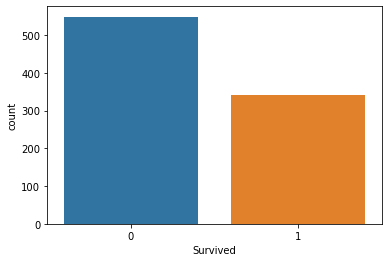

In [24]:
sns.countplot(data_train['Survived'],label='Count')


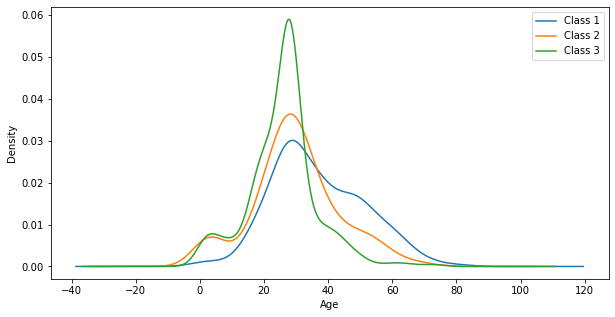

In [25]:
plt.figure(figsize=(10,5))
data_train.Age[data_train['Pclass']==1].plot(kind='kde')
data_train.Age[data_train['Pclass']==2].plot(kind='kde')
data_train.Age[data_train['Pclass']==3].plot(kind='kde')
plt.xlabel('Age')
plt.legend(('Class 1','Class 2','Class 3'))

In [26]:
x=data_train.groupby(['Sex'])[['Survived']].mean()
x

,Survived
Sex,
female,0.742038
male,0.188908


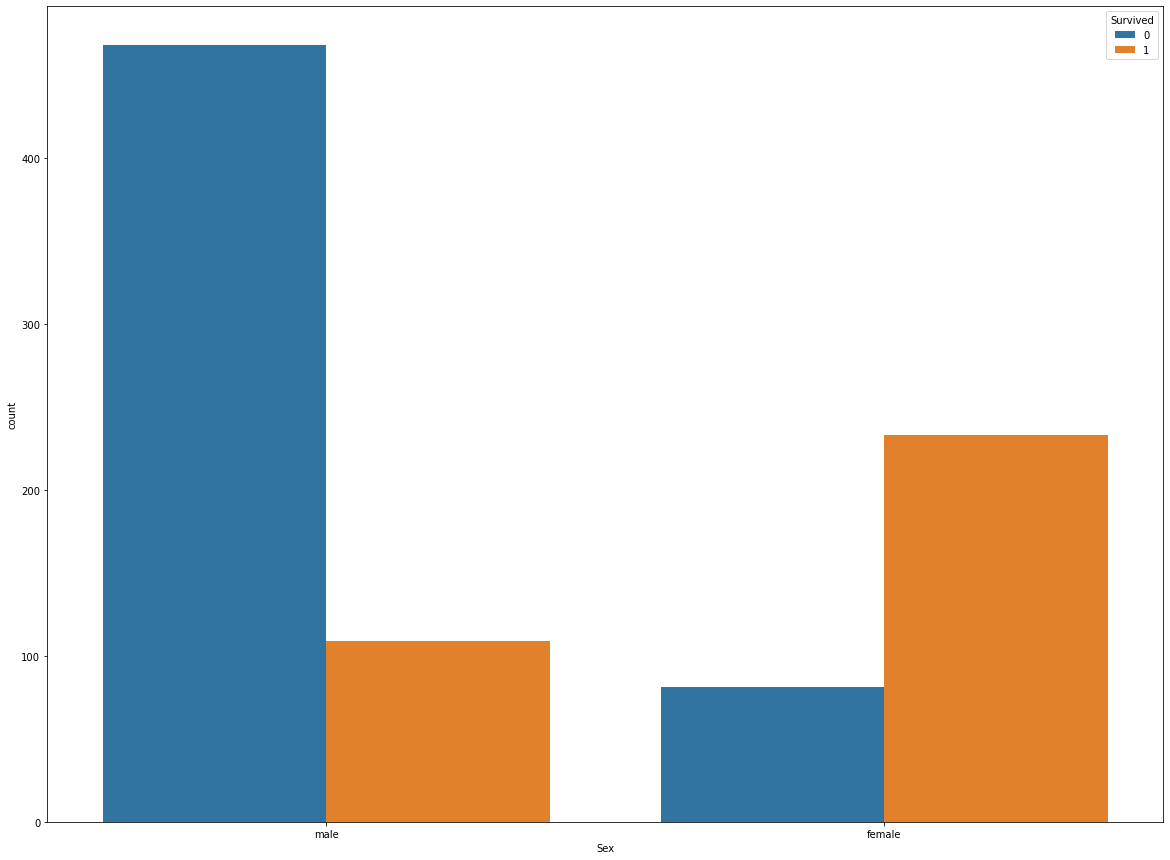

In [27]:
plt.figure(figsize=(20,15))
sns.countplot(x="Sex",hue="Survived",data=data_train)
plt.show()

In [28]:
data_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [29]:
data_train.groupby(['Pclass']).Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

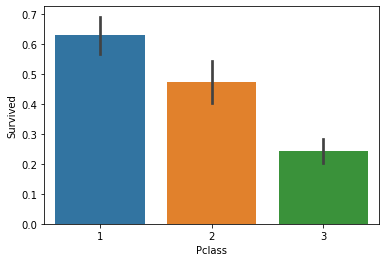

In [30]:
sns.barplot(x='Pclass',y='Survived',data=data_train)

In [31]:
data_train.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


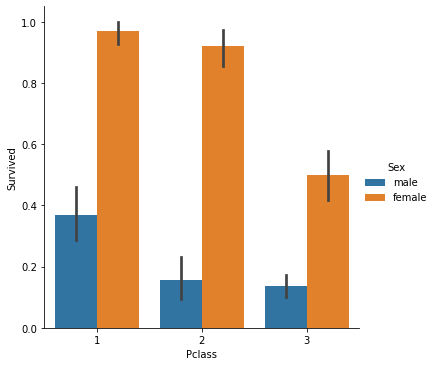

In [32]:
sns.catplot(data=data_train,x='Pclass',y='Survived',hue='Sex',kind='bar')

Text(0, 0.5, 'Density')

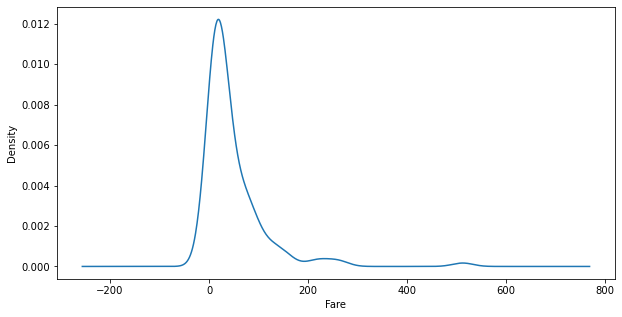

In [33]:
plt.figure(figsize=(10,5))
data_train.Fare[data_train['Survived']==1].plot(kind='kde')
plt.xlabel('Fare')
plt.ylabel('Density')

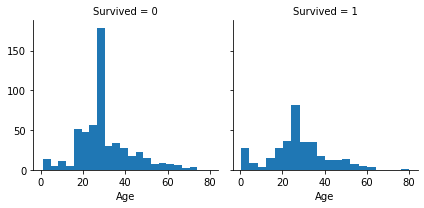

In [34]:
byAge = sns.FacetGrid(data_train, col='Survived')
byAge.map(plt.hist, 'Age', bins=20)

In [35]:
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [36]:
data_train.groupby(['Parch']).Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [37]:
data_train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

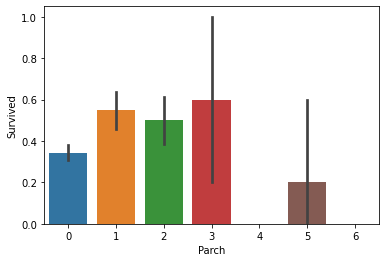

In [38]:
sns.barplot(x='Parch',y='Survived',data=data_train)

In [39]:
data_train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

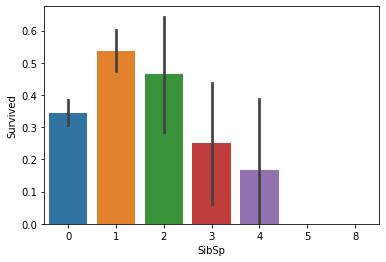

In [40]:
sns.barplot(x='SibSp',y='Survived',data=data_train)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

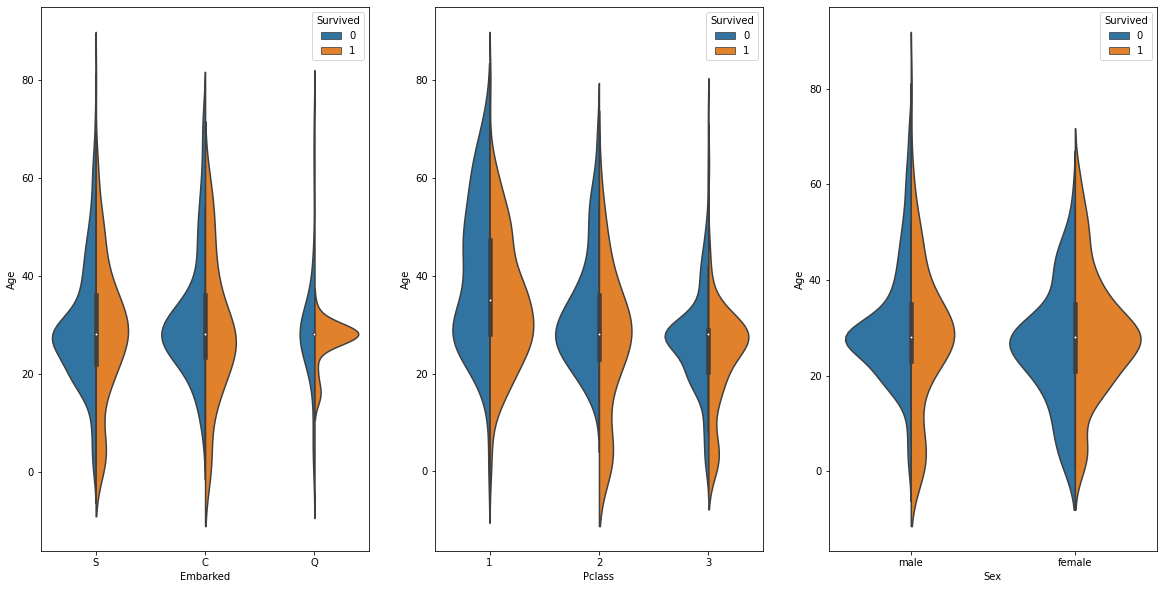

In [41]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=data_train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data_train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data_train, split=True, ax=ax3)

/home/ritayan98/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


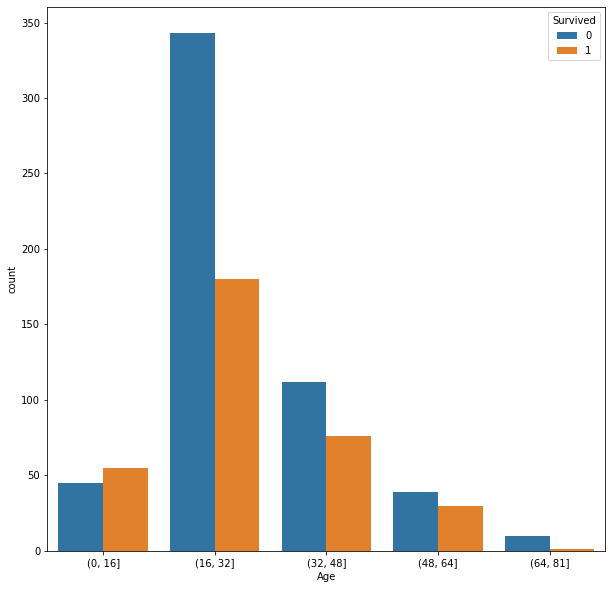

In [42]:
plt.subplots(figsize=(10,10))
sns.countplot(pd.cut(data_train['Age'],bins=[0,16,32,48,64,81]),hue='Survived',data=data_train)
plt.show()

/home/ritayan98/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


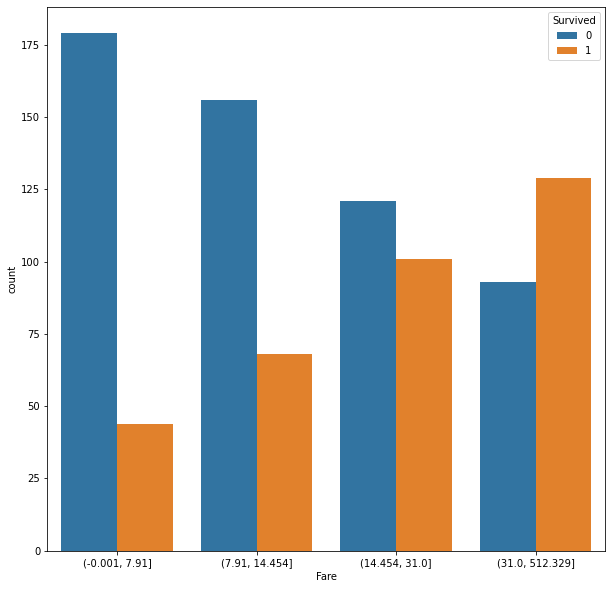

In [43]:
plt.subplots(figsize=(10,10))
sns.countplot(pd.qcut(data_train['Fare'],4),hue='Survived',data=data_train)
plt.show()

In [44]:
#combining train and test data set

In [45]:
combine=[data_train,data_test]

In [46]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [48]:
for i in combine:
    i['Title'] = i.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(data_train['Title'], data_test['Sex'])

Sex,female,male
Title,,
Don,0,1
Dr,0,3
Master,9,14
Miss,37,64
Mme,0,1
Mr,83,145
Mrs,21,37
Rev,2,1


In [50]:
for i in combine:
    i['Title'] = i['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    i['Title'] = i['Title'].replace('Mlle', 'Miss')
    i['Title'] = i['Title'].replace('Ms', 'Miss')
    i['Title'] = i['Title'].replace('Mme', 'Mrs')
    
data_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [51]:
value_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for i in combine:
    i['Title'] = i['Title'].map(value_map)
    i['Title'] = i['Title'].fillna(0)

data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [52]:
for i in combine:
    i['Sex'] = i['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [53]:
for i in combine:
    i['Embarked'] = i['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [54]:
for i in combine:
    i.loc[ i['Age'] <= 16, 'Age'] = 0
    i.loc[(i['Age'] > 16) & (i['Age'] <= 32), 'Age'] = 1
    i.loc[(i['Age'] > 32) & (i['Age'] <= 48), 'Age'] = 2
    i.loc[(i['Age'] > 48) & (i['Age'] <= 64), 'Age'] = 3
    i.loc[ i['Age'] > 64, 'Age'] = 4

In [55]:
for i in combine:
    i.loc[ i['Fare'] <= 7.91, 'Fare'] = 0
    i.loc[(i['Fare'] > 7.91) & (i['Fare'] <= 14.454), 'Fare'] = 1
    i.loc[(i['Fare'] > 14.454) & (i['Fare'] <= 31), 'Fare']   = 2
    i.loc[ i['Fare'] > 31, 'Fare'] = 3
    i['Fare'] = i['Fare'].astype(int)

In [56]:
for i in combine:
    i['FamilySize'] = i['SibSp'] +  i['Parch'] + 1

print (data_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [57]:
for i in combine:
    i['Is_Alone'] = 0
    i.loc[i['FamilySize'] == 1, 'Is_Alone'] = 1
    
print (data_train[['Is_Alone', 'Survived']].groupby(['Is_Alone'], as_index=False).mean())

   Is_Alone  Survived
0         0  0.505650
1         1  0.303538


In [58]:
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name  Sex  Age  SibSp  \
 0                              Braund, Mr. Owen Harris    0  1.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...    1  2.0      1   
 2                               Heikkinen, Miss. Laina    1  1.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  2.0      1   
 4                             Allen, Mr. William Henry    0  2.0      0   
 ..                                                 ...  ...  ...    ...  

In [59]:
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,Is_Alone
0,892,3,"Kelly, Mr. James",0,2.0,0,0,0,2,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,1,0,0,0,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,1,2,1,1,1
3,895,3,"Wirz, Mr. Albert",0,1.0,0,0,1,0,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,1,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,1.0,0,0,1,0,1,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,2.0,0,0,3,1,5,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,2.0,0,0,0,0,1,1,1
416,1308,3,"Ware, Mr. Frederick",0,1.0,0,0,1,0,1,1,1


In [60]:
data_train = data_train.drop(['Name', 'SibSp', 'Parch'], axis=1)
data_test=data_test.drop(['Name','SibSp','Parch'],axis=1)

In [61]:
data_train=data_train.drop(['PassengerId'],axis=1)
#data_test=data_test.drop(['PassengerId'],axis=1)

In [62]:
data_train

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,Is_Alone
0,0,3,0,1.0,0,0,1,2,0
1,1,1,1,2.0,3,1,3,2,0
2,1,3,1,1.0,1,0,2,1,1
3,1,1,1,2.0,3,0,3,2,0
4,0,3,0,2.0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,1,0,5,1,1
887,1,1,1,1.0,2,0,2,1,1
888,0,3,1,1.0,2,0,2,4,0
889,1,1,0,1.0,2,1,1,1,1


In [92]:
data_train = data_train.drop(['FamilySize', 'Is_Alone'], axis=1)
data_test=data_test.drop(['FamilySize', 'Is_Alone'],axis=1)

In [93]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [94]:
X_train = data_train.drop("Survived", axis=1)
Y_train = data_train["Survived"]
X_test = data_test.drop('PassengerId',axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [95]:
#For Cross Validation

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [97]:
#Logistic Regression

lg=LogisticRegression()
lg.fit(X_train,Y_train)
y_predict=lg.predict(X_test)
score_log=round(lg.score(X_train, Y_train) * 100, 2)
print(score_log)
x=cross_val_score(lg,X_train,Y_train,cv=10)
display_scores(x)
print(accuracy_score(Y_train,lg.predict(X_train)))

80.36
Scores: [0.8        0.82022472 0.76404494 0.86516854 0.78651685 0.79775281
 0.78651685 0.78651685 0.82022472 0.78651685]
Mean: 0.801
Std: 0.027
0.8035914702581369


In [98]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
y_predict = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(acc_svc)
a=cross_val_score(svc,X_train,Y_train,cv=10)
display_scores(a)
print(accuracy_score(Y_train,svc.predict(X_train)))

83.73
Scores: [0.8        0.85393258 0.75280899 0.85393258 0.83146067 0.79775281
 0.82022472 0.78651685 0.84269663 0.84269663]
Mean: 0.818
Std: 0.032
0.8372615039281706


In [99]:
#K-Nearest Neighbour

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, Y_train)
y_predict = knn.predict(X_test)
score_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(score_knn)
b=cross_val_score(knn,X_train,Y_train,cv=10)
display_scores(b)
print(accuracy_score(Y_train,knn.predict(X_train)))

84.18
Scores: [0.75555556 0.84269663 0.75280899 0.84269663 0.82022472 0.82022472
 0.7752809  0.78651685 0.84269663 0.83146067]
Mean: 0.807
Std: 0.034
0.8417508417508418


In [100]:
# Gaussian Naive Bayes

gauss = GaussianNB()
gauss.fit(X_train, Y_train)
Y_predict = gauss.predict(X_test)
score_gauss = round(gauss.score(X_train, Y_train) * 100, 2)
print(score_gauss)
c=cross_val_score(gauss,X_train,Y_train,cv=10)
display_scores(c)
print(accuracy_score(Y_train,gauss.predict(X_train)))

77.67
Scores: [0.74444444 0.73033708 0.71910112 0.85393258 0.78651685 0.7752809
 0.7752809  0.76404494 0.80898876 0.74157303]
Mean: 0.770
Std: 0.038
0.77665544332211


In [101]:
# Perceptron

percep = Perceptron()
percep.fit(X_train, Y_train)
Y_predict = percep.predict(X_test)
score_percep = round(percep.score(X_train, Y_train) * 100, 2)
print(score_percep)
d=cross_val_score(percep,X_train,Y_train,cv=10)
display_scores(d)
print(accuracy_score(Y_train,percep.predict(X_train)))

79.57
Scores: [0.61111111 0.73033708 0.74157303 0.38202247 0.82022472 0.6741573
 0.71910112 0.7752809  0.80898876 0.76404494]
Mean: 0.703
Std: 0.122
0.7957351290684624


In [102]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_predict = linear_svc.predict(X_test)
score_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(score_linear_svc)
e=cross_val_score(linear_svc,X_train,Y_train,cv=10)
display_scores(e)
print(accuracy_score(Y_train,linear_svc.predict(X_train)))

/home/ritayan98/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ritayan98/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ritayan98/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ritayan98/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ritayan98/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increa

79.46
Scores: [0.81111111 0.80898876 0.76404494 0.85393258 0.79775281 0.78651685
 0.7752809  0.76404494 0.80898876 0.7752809 ]
Mean: 0.795
Std: 0.026
0.7946127946127947


/home/ritayan98/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ritayan98/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ritayan98/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ritayan98/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [103]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
score_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print(score_sgd)
f=cross_val_score(sgd,X_train,Y_train,cv=10)
display_scores(f)
print(accuracy_score(Y_train,sgd.predict(X_train)))

72.39
Scores: [0.83333333 0.6741573  0.74157303 0.84269663 0.80898876 0.76404494
 0.76404494 0.7752809  0.79775281 0.76404494]
Mean: 0.777
Std: 0.046
0.7239057239057239


In [104]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_predict = dt.predict(X_test)
score_dt = round(dt.score(X_train, Y_train) * 100, 2)
print(score_dt)
g=cross_val_score(dt,X_train,Y_train,cv=10)
display_scores(g)
print(accuracy_score(Y_train,dt.predict(X_train)))

86.2
Scores: [0.76666667 0.84269663 0.70786517 0.82022472 0.86516854 0.79775281
 0.82022472 0.78651685 0.85393258 0.80898876]
Mean: 0.807
Std: 0.044
0.8619528619528619


In [112]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=1,criterion='entropy')
rf.fit(X_train, Y_train)
Y_predict = rf.predict(X_test)
rf.score(X_train, Y_train)
score_rf = round(rf.score(X_train, Y_train) * 100, 2)
print(score_rf)
h=cross_val_score(rf,X_train,Y_train,cv=10)
display_scores(h)
print(accuracy_score(Y_train,rf.predict(X_train)))

85.97
Scores: [0.77777778 0.85393258 0.71910112 0.84269663 0.86516854 0.83146067
 0.82022472 0.78651685 0.87640449 0.83146067]
Mean: 0.820
Std: 0.045
0.8597081930415263


In [106]:
from xgboost import XGBClassifier

In [107]:
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)
y_predict=xgb.predict(X_test)
score_xgb=round(xgb.score(X_train,Y_train)*100,2)
print(score_xgb)
m=cross_val_score(xgb,X_train,Y_train,cv=10)
display_scores(m)
print(accuracy_score(Y_train,xgb.predict(X_train)))

86.08
Scores: [0.77777778 0.85393258 0.71910112 0.83146067 0.86516854 0.84269663
 0.82022472 0.7752809  0.87640449 0.83146067]
Mean: 0.819
Std: 0.046
0.8608305274971941


In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [109]:
#Adaboost

ada=AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train,Y_train)
y_predict=ada.predict(X_test)
score_ada=round(ada.score(X_train,Y_train)*100,2)
print(score_ada)
n=cross_val_score(ada,X_train,Y_train,cv=10)
display_scores(m)
print(accuracy_score(Y_train,ada.predict(X_train)))

81.59
Scores: [0.77777778 0.85393258 0.71910112 0.83146067 0.86516854 0.84269663
 0.82022472 0.7752809  0.87640449 0.83146067]
Mean: 0.819
Std: 0.046
0.8159371492704826


In [110]:
#Gredient boost

gbc=GradientBoostingClassifier(n_estimators=100, random_state=0)
gbc.fit(X_train,Y_train)
y_predict=gbc.predict(X_test)
score_gbc=round(gbc.score(X_train,Y_train)*100,2)
print(score_gbc)
n=cross_val_score(gbc,X_train,Y_train,cv=10)
display_scores(m)
print(accuracy_score(Y_train,gbc.predict(X_train)))

84.85
Scores: [0.77777778 0.85393258 0.71910112 0.83146067 0.86516854 0.84269663
 0.82022472 0.7752809  0.87640449 0.83146067]
Mean: 0.819
Std: 0.046
0.8484848484848485


In [111]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
'Random Forest', 'Naive Bayes', 'Perceptron',
'Stochastic Gradient Decent', 'Linear SVC',
'Decision Tree','XGB Classifier','ADABoost Classifier','Gradient Boost Classifier'],
'Score': [acc_svc, score_knn, score_log,
score_rf, score_gauss, score_percep,
score_sgd, score_linear_svc, score_dt,score_xgb,score_ada,score_gbc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,86.20
9,XGB Classifier,86.08
3,Random Forest,85.97
11,Gradient Boost Classifier,84.85
1,KNN,84.18
0,Support Vector Machines,83.73
10,ADABoost Classifier,81.59
2,Logistic Regression,80.36
5,Perceptron,79.57
7,Linear SVC,79.46


In [113]:
submit = pd.DataFrame({"PassengerId": data_test["PassengerId"],"Survived": Y_predict})
submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [114]:
submit.Survived.value_counts()

0    258
1    160
Name: Survived, dtype: int64

In [115]:
submit.to_csv('/mnt/c/Users/ADMIN/Desktop/final_prediction.csv', index=False)